In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle  # Import pickle


In [25]:
df=pd.read_csv('AI ML Internship Training Data.csv')
#print(df)
print(df.head())
print(df.info())
print(df.describe())

  Shipment ID     Origin Destination Shipment Date Planned Delivery Date  \
0  SHIP000000     Jaipur      Mumbai    2023-04-26            2023-05-01   
1  SHIP000001  Bangalore       Delhi    2023-02-09            2023-02-13   
2  SHIP000002     Mumbai     Chennai    2023-09-19            2023-09-25   
3  SHIP000003  Hyderabad   Ahmedabad    2023-04-01            2023-04-05   
4  SHIP000004    Chennai     Kolkata    2023-11-24            2023-11-26   

  Actual Delivery Date Vehicle Type  Distance (km) Weather Conditions  \
0           2023-05-02      Trailer           1603               Rain   
1           2023-02-17      Trailer           1237              Storm   
2           2023-09-25        Truck           1863              Clear   
3           2023-04-05    Container           1374              Clear   
4           2023-11-28    Container            676              Clear   

  Traffic Conditions Delayed  
0              Light     Yes  
1           Moderate     Yes  
2          

In [26]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Before:")
print(missing_values)


Missing Values Before:
Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64


In [27]:

# Fill missing values in 'Vehicle Type' with the mode
df['Vehicle Type'].fillna(df['Vehicle Type'].mode()[0], inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_33008\3761777503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle Type'].fillna(df['Vehicle Type'].mode()[0], inplace=True)


In [28]:

# Confirm missing values are handled
missing_values_after = df.isnull().sum()
print("Missing Values After:")
print(missing_values_after)


Missing Values After:
Shipment ID              0
Origin                   0
Destination              0
Shipment Date            0
Planned Delivery Date    0
Actual Delivery Date     0
Vehicle Type             0
Distance (km)            0
Weather Conditions       0
Traffic Conditions       0
Delayed                  0
dtype: int64


In [29]:

# Analyze 'Delayed' target distribution
delay_distribution = df['Delayed'].value_counts()
print("Delay Distribution:")
print(delay_distribution)


Delay Distribution:
Delayed
Yes    14757
No      5243
Name: count, dtype: int64


In [30]:
label_encoders = {}  # Initialize dictionary to store label encoders
for col in ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Delayed']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # Save encoder

In [31]:

# Set style for plots
sns.set(style="whitegrid")


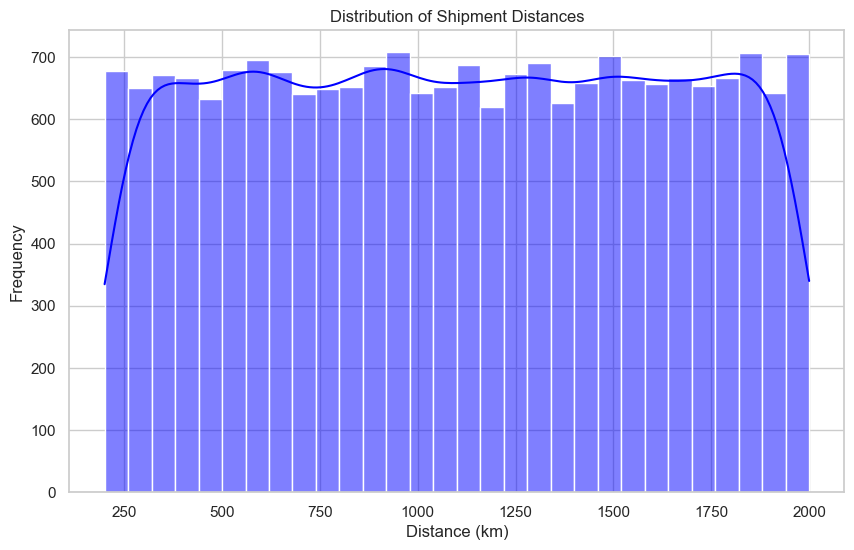

In [32]:

# Distribution of distances
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance (km)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Shipment Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()


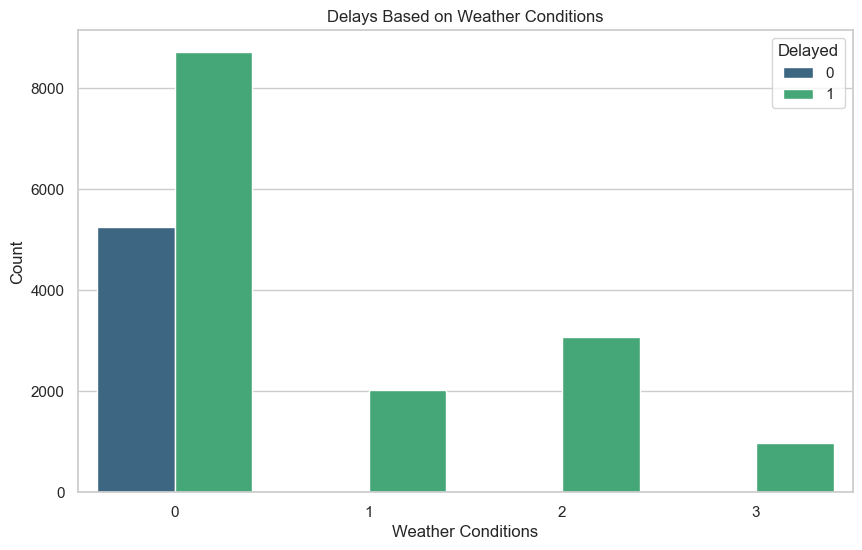

In [33]:

# Delays based on weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather Conditions', hue='Delayed', palette='viridis')
plt.title('Delays Based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()


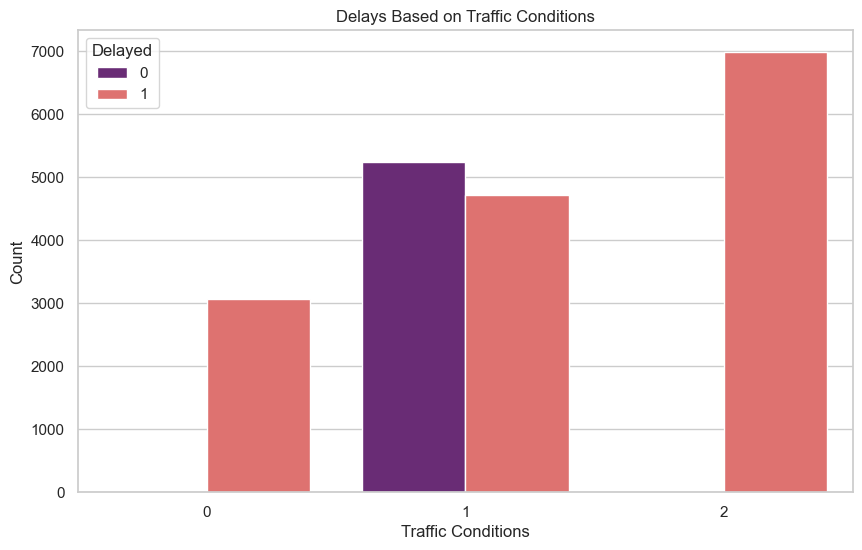

In [34]:

# Delays based on traffic conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Traffic Conditions', hue='Delayed', palette='magma')
plt.title('Delays Based on Traffic Conditions')
plt.xlabel('Traffic Conditions')
plt.ylabel('Count')
plt.show()


In [35]:

# Feature selection
X = df[['Origin', 'Destination', 'Vehicle Type', 'Distance (km)', 'Weather Conditions', 'Traffic Conditions']]
y = df['Delayed']


In [36]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:

# Initialize models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()


In [38]:
models = {'Logistic Regression': log_reg, 'Decision Tree': decision_tree, 'Random Forest': random_forest}
best_model = None
best_f1_score = 0  # Initialize best_f1_score
best_model_name = None # Initialize best_model_name

In [39]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if f1 > best_f1_score:
        best_f1_score=f1
        best_model=model
        best_model_name=name

print(f'\nBest Model: {best_model_name}')


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Accuracy: 0.6278333333333334
Precision: 0.7026674127961201
Recall: 0.8549704947798457
F1 Score: 0.7713729906829119
Confusion Matrix:
 [[   0 1594]
 [ 639 3767]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1594
           1       0.70      0.85      0.77      4406

    accuracy                           0.63      6000
   macro avg       0.35      0.43      0.39      6000
weighted avg       0.52      0.63      0.57      6000


Model: Decision Tree
Accuracy: 0.8696666666666667
Precision: 0.9108843537414966
Recall: 0.9117113027689514
F1 Score: 0.9112976406533575
Confusion Matrix:
 [[1201  393]
 [ 389 4017]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      1594
           1       0.91      0.91      0.91      4406

    accuracy                           0.87      6000
   macro avg       0.83      0.83  

In [40]:
# Save the best trained model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save label encoders
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

print("Model and encoders saved.")

Model and encoders saved.
